In [1]:
library(rstan)
library(brms)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: Rcpp
Loading 'brms' package (version 2.9.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').

Attaching package: ‘brms’

The following object is masked from ‘package:rstan’:

    loo



In [2]:
fish_num_count <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/3-8-1-fish-num-1.csv")
head(fish_num_count)

fish_num,weather,temperature
<int>,<fct>,<dbl>
0,cloudy,5.5
2,cloudy,21.1
5,cloudy,17.2
1,cloudy,5.0
3,cloudy,28.3
5,cloudy,28.3


In [3]:
summary(fish_num_count)

    fish_num     weather    temperature   
 Min.   :0.0   cloudy:50   Min.   : 0.20  
 1st Qu.:0.0   sunny :50   1st Qu.: 6.75  
 Median :1.0               Median :13.25  
 Mean   :1.6               Mean   :14.75  
 3rd Qu.:2.0               3rd Qu.:23.23  
 Max.   :8.0               Max.   :29.70  

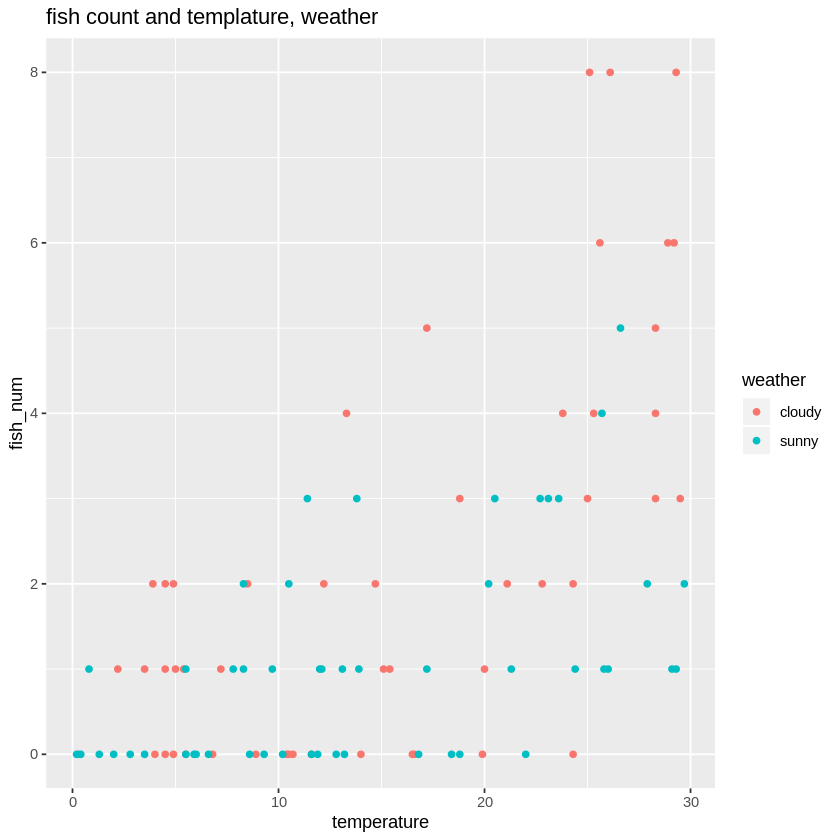

In [4]:
ggplot(data = fish_num_count, mapping = aes(x = temperature, y = fish_num)) + geom_point(aes(color = weather)) + labs(title = "fish count and templature, weather")

In [7]:
glm_pois_brms <- brm(
    formula = fish_num ~ weather + temperature,
    family = poisson(),
    data = fish_num_count,
    seed = 1,
    prior = c(set_prior("", class = "Intercept"))
)
glm_pois_brms

Compiling the C++ model
Start sampling


 Family: poisson 
  Links: mu = log 
Formula: fish_num ~ weather + temperature 
   Data: fish_num_count (Number of observations: 100) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
Intercept       -0.80      0.23    -1.26    -0.35       2382 1.00
weathersunny    -0.60      0.17    -0.93    -0.28       3142 1.00
temperature      0.08      0.01     0.06     0.10       2604 1.00

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effective sample size, and Rhat is the potential 
scale reduction factor on split chains (at convergence, Rhat = 1).

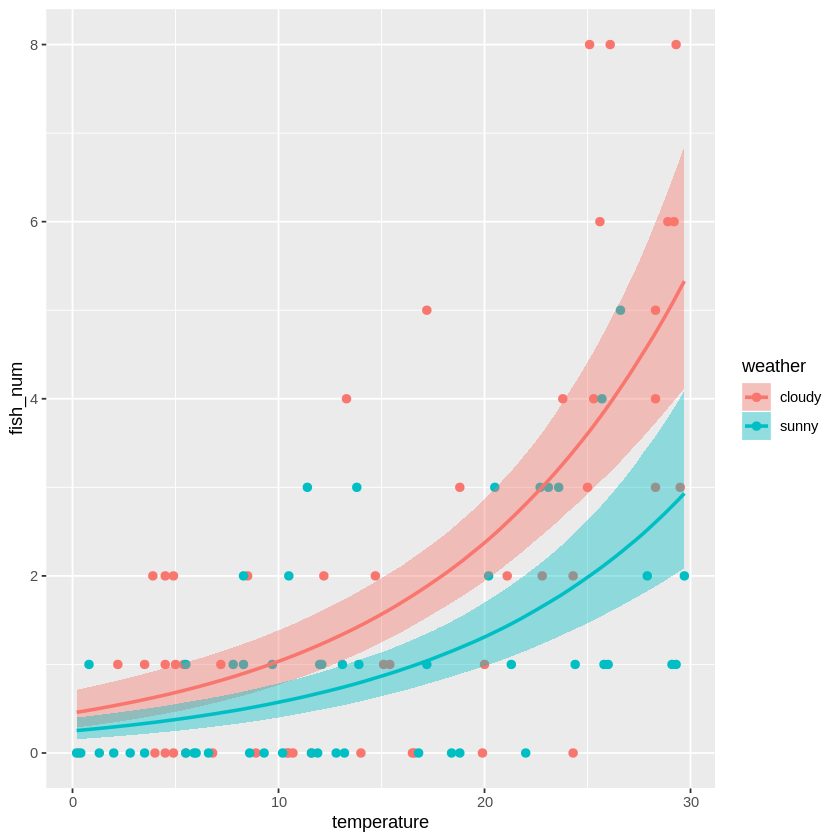

In [8]:
eff <- marginal_effects(glm_pois_brms, effects = "temperature:weather")
plot(eff, points = TRUE)

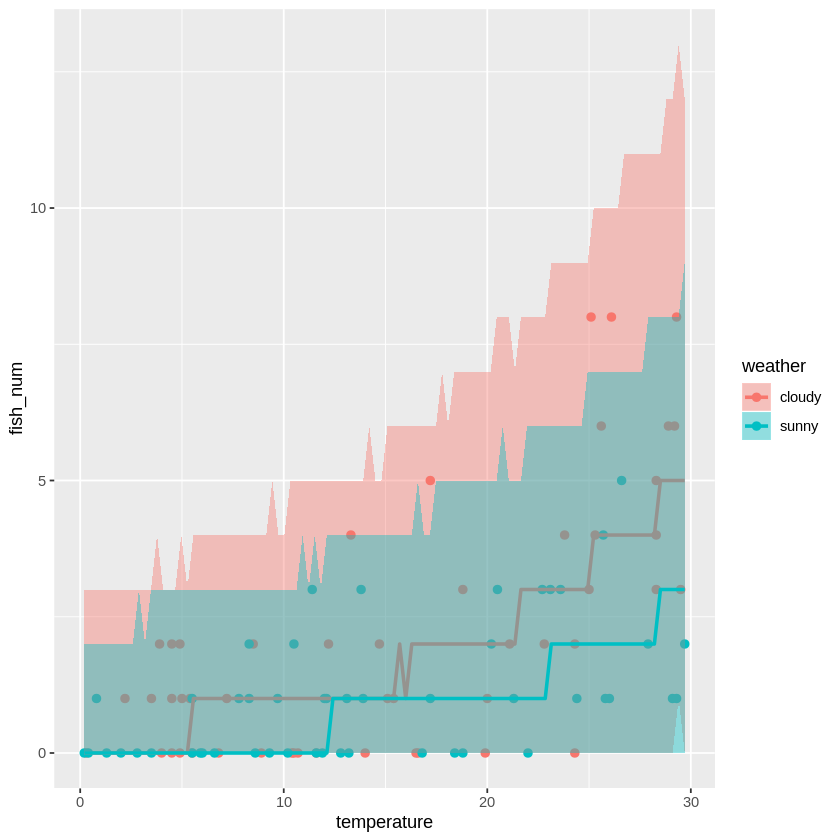

In [9]:
set.seed(1)
eff_pre <- marginal_effects(glm_pois_brms, method = "predict", effects = "temperature:weather", probs = c(0.005, 0.995))
plot(eff_pre, points = TRUE)

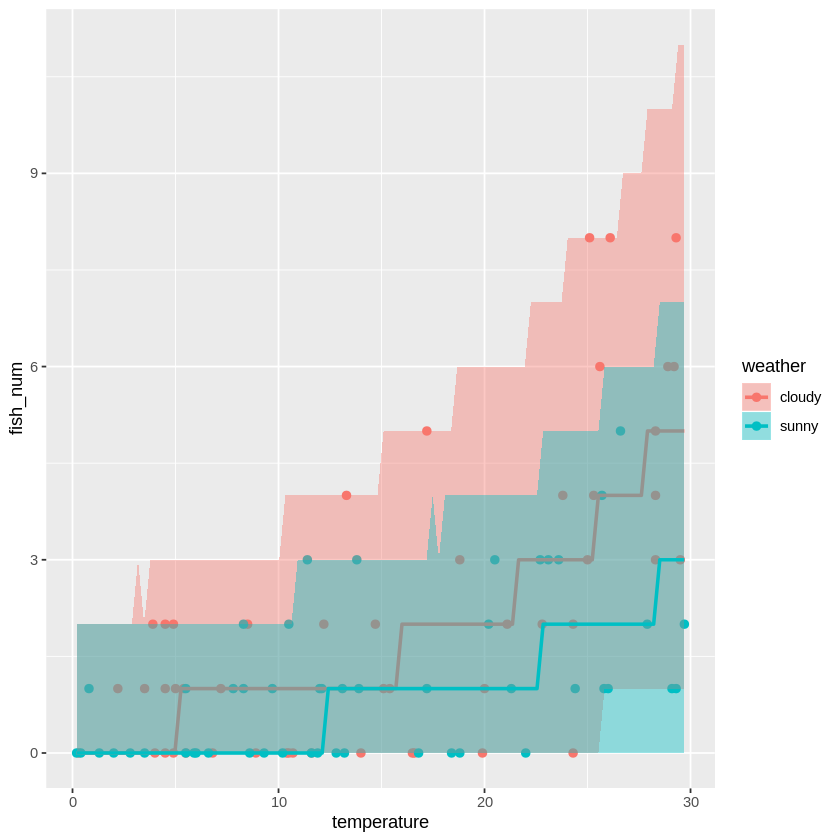

In [10]:
eff_pre <- marginal_effects(glm_pois_brms, method = "predict", effects = "temperature:weather", probs = c(0.025, 0.975))
plot(eff_pre, points = TRUE)